In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
data_volkswagen = pd.read_csv("volkswagen_cleaned.csv")

In [24]:
data_volkswagen_numeric = pd.read_csv("volkswagen_cleaned_numeric.csv")

In [25]:
data_audi = pd.read_csv("audi_cleaned.csv")

In [26]:
data_audi_numeric = pd.read_csv("audi_cleaned_numeric.csv")

In [27]:
data_mercedes = pd.read_csv("mercedes_cleaned.csv")

In [28]:
data_mercedes_numeric = pd.read_csv("mercedes_cleaned_numeric.csv")

In [21]:
data_skoda = pd.read_csv("skoda_cleaned.csv")

In [33]:
data_skoda_numeric = pd.read_csv("skoda_cleaned_numeric.csv")

<Axes: >

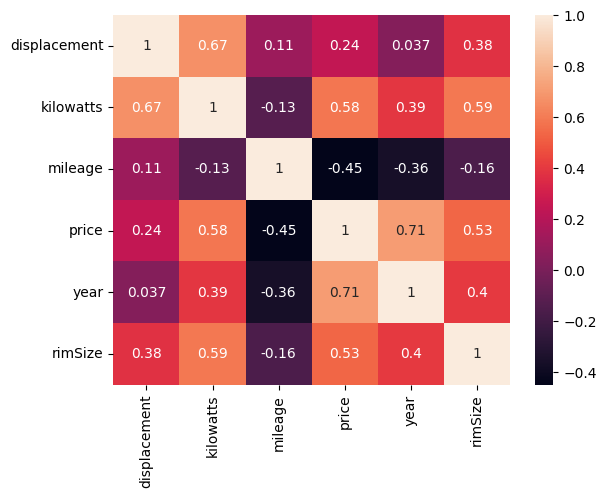

In [29]:
korelacija = data_volkswagen_numeric.corr()
sns.heatmap(data=korelacija, annot=True)

<Axes: >

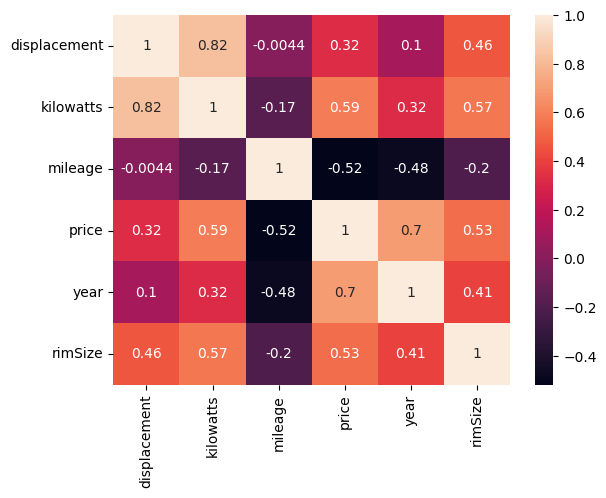

In [30]:
korelacija = data_audi_numeric.corr()
sns.heatmap(data=korelacija, annot=True)

<Axes: >

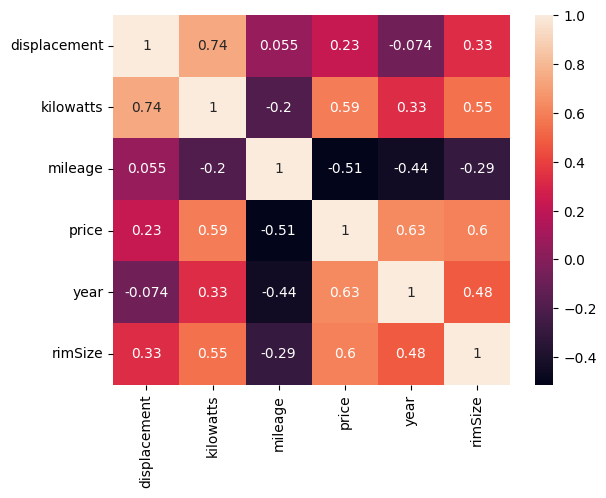

In [31]:
korelacija = data_mercedes_numeric.corr()
sns.heatmap(data=korelacija, annot=True)

<Axes: >

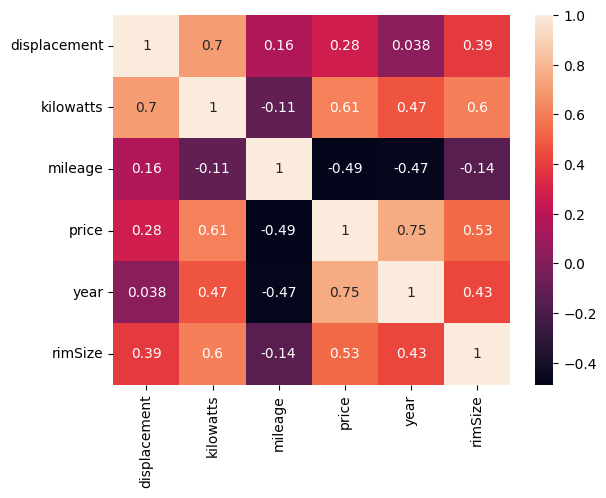

In [34]:
korelacija = data_skoda_numeric.corr()
sns.heatmap(data=korelacija, annot=True)

In [45]:
data_mercedes["type"].unique()

array(['Limuzina', 'Karavan', 'unavailable', 'Malo auto', 'Sportski/kupe',
       'Kombi', 'Monovolumen', 'Kabriolet', 'SUV', 'Terenac', 'Ostalo',
       'Oldtimer', 'Off-Road', 'Off Road', 'Caddy', 'Pick up'],
      dtype=object)

In [13]:
#MACHINE LEARNING DIO
data_volkswagen_numeric

,displacement,kilowatts,mileage,price,year,rimSize
0,2.0,140.0,150000.0,53000,2018.0,19.0
1,1.6,88.0,166.0,26500,2016.0,17.0
2,1.6,77.0,230000.0,13000,2010.0,16.0
3,1.6,72.0,220000.0,9000,1989.0,16.0
4,2.0,103.0,280000.0,19900,2011.0,18.0
...,...,...,...,...,...,...
50564,2.0,81.0,215000.0,14750,2009.0,16.0
50565,1.6,77.0,286146.0,14999,2012.0,16.0
50566,2.0,103.0,271000.0,12000,2010.0,16.0
50567,1.6,77.0,262035.0,14600,2012.0,16.0


In [14]:
X = data_volkswagen_numeric.drop(['price'], axis = 1).values
y= data_volkswagen_numeric['price'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treniranje RandomForestRegressora sa najboljim hiperparametrima (prekopirati imena hiperparametara samo bez prefixa "regressor__")
model =  RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4, n_estimators=300)
model.fit(X_train, y_train)

In [ ]:
# Predikcija cijene za tražene specifikacije displacement, kilowatts, mileage, year, rimSize
cijena = model.predict([[1.3, 133, 72_000, 2008, 16]])
cijena_rounded = cijena[0].round(2)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Cijena za tražene specifikacije iznosi: {cijena_rounded} KM")
print(r2)

Cijena za tražene specifikacije iznosi: 16441.26 KM
0.941706345887569


In [ ]:
data_audi_numeric

,displacement,kilowatts,mileage,price,year,rimSize
0,1.8,110.0,400.0,3700,2001.0,15.0
1,1.6,74.0,270000.0,1950,1996.0,15.0
2,2.2,100.0,348000.0,5000,1983.0,15.0
3,2.5,110.0,362000.0,4800,1999.0,16.0
4,2.0,125.0,325000.0,10500,2008.0,18.0
...,...,...,...,...,...,...
20483,2.0,103.0,300000.0,8000,2005.0,16.0
20484,2.5,120.0,222222.0,6000,2005.0,16.0
20485,3.0,171.0,400000.0,11800,2004.0,17.0
20486,2.0,100.0,254400.0,15000,2011.0,16.0


In [ ]:
X = data_audi_numeric.drop(['price'], axis = 1).values
y= data_audi_numeric['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treniranje RandomForestRegressora sa najboljim hiperparametrima (prekopirati imena hiperparametara samo bez prefixa "regressor__")
model =  RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4, n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=300)

In [ ]:
# Predikcija cijene za tražene specifikacije 	displacement, kilowatts, mileage, year, rimSize
cijena = model.predict([[2.7, 300, 200_000, 2010, 10]])
cijena_rounded = cijena[0].round(2)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Cijena za tražene specifikacije iznosi: {cijena_rounded} KM")
print(r2)

Cijena za tražene specifikacije iznosi: 30628.26 KM
0.9393211160873266


In [ ]:
data_mercedes_numeric

,displacement,kilowatts,mileage,price,year,rimSize
0,2.2,70.0,230000.0,3200,1996.0,16.0
1,2.5,69.0,350000.0,3200,1990.0,16.0
2,2.5,67.0,350000.0,6200,1988.0,17.0
3,2.2,85.0,335968.0,4500,2003.0,16.0
4,1.7,70.0,237586.0,3650,2002.0,15.0
...,...,...,...,...,...,...
13341,1.7,55.0,300000.0,2800,2001.0,15.0
13342,2.0,90.0,400000.0,5900,2002.0,14.0
13343,2.2,90.0,276000.0,8700,2005.0,16.0
13344,2.7,115.0,400000.0,7900,2002.0,15.0


In [ ]:
X = data_mercedes_numeric.drop(['price'], axis = 1).values
y= data_mercedes_numeric['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treniranje RandomForestRegressora sa najboljim hiperparametrima (prekopirati imena hiperparametara samo bez prefixa "regressor__")
model =  RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4, n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=300)

In [ ]:
# Predikcija cijene za tražene specifikacije 	displacement, kilowatts, mileage, year, rimSize
cijena = model.predict([[2.7, 300, 200_000, 2010, 10]])
cijena_rounded = cijena[0].round(2)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Cijena za tražene specifikacije iznosi: {cijena_rounded} KM")
print(r2)

Cijena za tražene specifikacije iznosi: 37089.83 KM
0.9239712908304956


In [ ]:
target_value = cijena_rounded
lower_bound = target_value 
upper_bound = target_value + 10000

# Check if values are within the range
data_volkswagen['in_range'] = data_volkswagen['price'].between(lower_bound, upper_bound)

# Optional: Filter the DataFrame to get rows where the values are in the range
result_df = data_volkswagen[data_volkswagen['in_range']]

result_df = result_df.sort_values(by='price')
result_df[["price","model"]].head(10)

,price,model
35636,37100,Golf
37670,37200,Touareg
19346,37200,T6 Drugi
13371,37300,Passat
20309,37300,Golf
28883,37300,Tiguan
20782,37300,T5 Caravelle
31784,37300,Touareg
37672,37350,Passat
2705,37400,Passat
